In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# from wordcloud import WordCloud
import numpy as np
from random import randint, choice

In [4]:
def show(x, n = 5):
    print(x.shape)
    return x.head(n)

In [5]:
train = pd.read_csv("../../data/train.csv")\
.assign(
    labels = lambda df: df.iloc[:, 8:].sum(axis = 1),
    task_1 = lambda df: df.iloc[:, 8:].sum(axis = 1) > 0
)

show(train)

(3817, 20)


,comment_id,sentence_pos,reply_to,sentence,racial_target,other_target,implicit,stereotype,xenophobia,suffering,economic,migration,culture,benefits,health,security,dehumanisation,others,labels,task_1
0,0,1,0,La solución es desarrollar el pensamiento crít...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,0,2,0,Hay que enseñar que la magia no existe.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,0,3,0,Que todos los avances de la humanidad siempre ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,0,4,0,Enseñar en las escuelas la historia de las rel...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,0,5,0,Desde las religiones de la edad de piedra hast...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


In [6]:
train[["sentence", "task_1"]].to_csv("../../data/task_1.csv", index = False)

In [7]:
pd.concat(
    (
        train.sentence,
        train.iloc[:, 8:-2]
    ),
    axis = 1
)\
.to_csv("../../data/task_2.csv", index = False)

In [9]:
train.task_1.value_counts(normalize = False)

False    2946
True      871
Name: task_1, dtype: int64

In [8]:
train.task_1.value_counts(normalize = True)

False    0.77181
True     0.22819
Name: task_1, dtype: float64

# text length

## characters

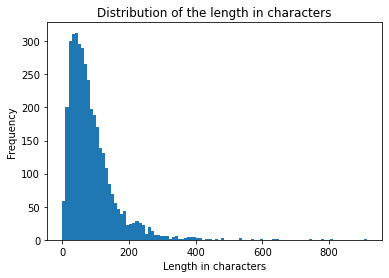

In [7]:
train.sentence.map(len).plot.hist(bins = 100)
plt.title("Distribution of the length in characters")
plt.xlabel("Length in characters")
plt.show()

In [8]:
train.sentence.map(len).describe()

count    3817.000000
mean       87.057113
std        71.773446
min         1.000000
25%        40.000000
50%        69.000000
75%       113.000000
max       913.000000
Name: sentence, dtype: float64

## words

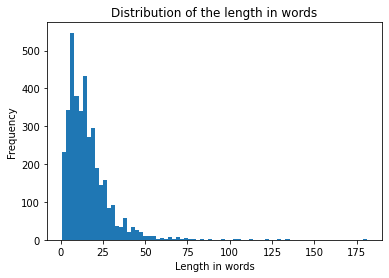

In [9]:
train.sentence.map(lambda x: len(x.split(" "))).plot.hist(bins = 75)
plt.title("Distribution of the length in words")
plt.xlabel("Length in words")
plt.show()

In [10]:
train.sentence.map(lambda x: len(x.split(" "))).describe()

count    3817.000000
mean       15.964370
std        12.805953
min         1.000000
25%         8.000000
50%        13.000000
75%        21.000000
max       181.000000
Name: sentence, dtype: float64

## outliers

### shortest documents

In [11]:
train.sentence.loc[train.sentence.map(len) < 10]

671     baia baia
703      Venid ya
765      España? 
777         Chapó
786       Normal.
806      Ojalá...
840     Welcome. 
860       Welcome
892     Un abrazo
901           +1!
946      Problem?
979      Rasistas
980     Tuya es!!
1011     Venid ya
1029    en Ronda?
1032     Te mato.
1096     Vomitivo
1117    YO VOX!!!
1769       A VOX?
2000      ni yo. 
2162         Si. 
2182    Gracias. 
2271     adivina 
2346            X
2347            V
2382     Vota V*X
2541          VOX
2604          VOX
2626          Vox
2726    Menores. 
2745        ¿Por?
2900    :tinfoil:
2929       :shit:
2967      Vivir? 
2972       ojalá.
3080      Madura.
3177    Pues sí. 
3225           xD
3589     Viva vox
3600       Telita
Name: sentence, dtype: object

In [12]:
# task_1 label on shortest documents
train.task_1.loc[train.sentence.map(len) < 10]

671     False
703     False
765     False
777     False
786     False
806     False
840     False
860     False
892     False
901     False
946     False
979     False
980     False
1011    False
1029    False
1032    False
1096    False
1117    False
1769    False
2000    False
2162    False
2182    False
2271    False
2346    False
2347    False
2382    False
2541    False
2604    False
2626    False
2726    False
2745    False
2900    False
2929    False
2967    False
2972    False
3080    False
3177    False
3225    False
3589    False
3600    False
Name: task_1, dtype: bool

There is one mistaken label (1011)

In [13]:
train.iloc[:, 4:-1].loc[train.sentence.map(len) < 10]

,racial_target,other_target,implicit,stereotype,xenophobia,suffering,economic,migration,culture,benefits,health,security,dehumanisation,others,labels
671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
777,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### longest documents

In [14]:
longest = train.loc[train.sentence.map(len) > 600]

In [15]:
longest.sentence.tolist()

['Si señor hay que dar una oportunidad a esa gente,pero resulta que aquí hay millones de españoles en el paro esperando una oportunidad y otros tantos trabajando fuera del pais(legalmente) y lo lógico es que los españoles miremos por los españoles primero,yo entiendo que mucha gente lo pase mal,nosotros en España también lo pasamos muy mal hace años y nos a costado mucho estar donde estamos,a pesar de los malos políticos que tenemos por desgracia,el trabajo del campo o la construcción lo tenían que hacer los españoles y si se les ofrece y no lo quieren,pues se le quita la prestación y mejorar esos trabajos aunque suban los precios,pero el problema está en el paro y no en la inmigración,solo de esa manera se les puede ayudar en origen',
 'No queremos saber por qué son más baratos muchos productos, no queremos saber que la piramide poblacional hace inviable las pensiones si no hay más gente (por natalidad o por inmigración) que aporte, no queremos saber que en el resto de Europa en el añ

In [16]:
longest.task_1

1312    True
1426    True
2575    True
3344    True
3359    True
3536    True
Name: task_1, dtype: bool

In [17]:
longest.iloc[:, 4:-1]

,racial_target,other_target,implicit,stereotype,xenophobia,suffering,economic,migration,culture,benefits,health,security,dehumanisation,others,labels
1312,1,0,1,1,0,1,0,0,0,1,0,0,0,0,2
1426,1,0,0,1,1,0,1,0,1,0,0,0,0,0,3
2575,1,0,1,1,0,1,0,1,0,1,0,1,0,0,4
3344,1,0,0,1,0,0,0,1,1,1,1,1,0,0,5
3359,1,0,0,1,0,1,0,1,0,0,0,1,0,0,3
3536,1,0,1,1,0,0,0,0,1,1,0,1,1,1,5


# vocabulary

In [18]:
vectorizer = CountVectorizer()
frequencies = vectorizer.fit_transform(train.sentence)
frequencies.shape

(3817, 9098)

In [19]:
vectorizer_binary = CountVectorizer(binary = True)
frequencies_binary = vectorizer_binary.fit_transform(train.sentence)
frequencies_binary.shape

(3817, 9098)

In [20]:
vocabulary = pd.DataFrame(
    dict(
        term_frequency = frequencies.toarray().sum(axis = 0),
        document_frequency = frequencies_binary.toarray().sum(axis = 0) / train.shape[0],
    ),
    index = vectorizer.get_feature_names_out(),

)

vocabulary.sort_values("document_frequency", ascending = False).head(50)

,term_frequency,document_frequency
que,2972,0.481006
de,2568,0.433063
la,1677,0.317003
no,1286,0.282683
en,1112,0.237097
los,1148,0.225308
el,1016,0.215090
es,840,0.189678
se,774,0.172649
lo,724,0.165313


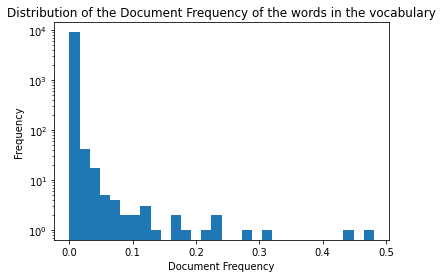

In [21]:
vocabulary.document_frequency.plot.hist(log = True, bins = 30)
plt.title("Distribution of the Document Frequency of the words in the vocabulary")
plt.xlabel("Document Frequency")
plt.show()

In [22]:
vocabulary.describe(percentiles = np.linspace(0, 1, 11))

,term_frequency,document_frequency
count,9098.000000,9098.000000
mean,6.031655,0.001424
std,56.255798,0.010696
min,1.000000,0.000262
0%,1.000000,0.000262
10%,1.000000,0.000262
20%,1.000000,0.000262
30%,1.000000,0.000262
40%,1.000000,0.000262
50%,1.000000,0.000262


In [23]:
stop = stopwords.words("spanish")
stop[:5]

['de', 'la', 'que', 'el', 'en']

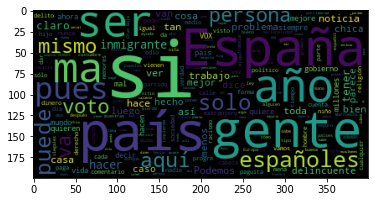

In [24]:
wc = WordCloud(stopwords = stop)\
.generate(train.sentence.sum())
plt.imshow(wc)
plt.show()

# latent dirichlet allocation

In [25]:
# Using CountVectorizer
for j in range(10):
    max_df = choice([3, 2, 1, .1, .1]) / 10
#     min_df = randint(2, 10)
    n_components = 5 * randint(1, 10)
    ngram_range = choice([(1, 1), (1, 2), (2, 2), (2, 3)])
    
    vectorizer_lda = CountVectorizer(
        max_df = max_df,
#         min_df = min_df,
        ngram_range = ngram_range,
#         stop_words = stop
    )
    features = vectorizer_lda.fit_transform(train.sentence)
#     print("documents with 0 features:", )
#     print("features", features.shape)
    lda = LatentDirichletAllocation(
        n_components = n_components
    #     verbose = 1
    )
    lda.fit(features)
    print(f"max_df: {max_df:>4}, n_components: {n_components:>3}, n_gram_range: {ngram_range}, perplexity: {lda.bound_:>12,.3f}, null documents: {(features.sum(axis = 1) < 1).sum():>5,}")
#     print(f"max_df: {max_df:>4}, min_df: {min_df:>3}, n_components: {n_components:>3}, n_gram_range: {ngram_range}, perplexity: {lda.bound_:>12,.3f}, null documents: {(features.sum(axis = 1) < 1).sum():>5,}")
    

max_df: 0.01, n_components:  30, n_gram_range: (2, 3), perplexity:  129,577.670, null documents:    58
max_df: 0.01, n_components:  30, n_gram_range: (1, 1), perplexity:   20,505.855, null documents:    50
max_df:  0.1, n_components:  35, n_gram_range: (2, 2), perplexity:   56,173.668, null documents:    56
max_df: 0.01, n_components:   5, n_gram_range: (2, 3), perplexity:  108,609.492, null documents:    58
max_df: 0.01, n_components:  40, n_gram_range: (2, 2), perplexity:   68,183.646, null documents:    59
max_df: 0.01, n_components:  30, n_gram_range: (1, 1), perplexity:   20,051.721, null documents:    50
max_df:  0.3, n_components:  10, n_gram_range: (2, 3), perplexity:  104,589.839, null documents:    56
max_df:  0.2, n_components:  40, n_gram_range: (2, 3), perplexity:  120,518.831, null documents:    56
max_df:  0.1, n_components:  20, n_gram_range: (2, 3), perplexity:  112,701.589, null documents:    56
max_df:  0.3, n_components:  20, n_gram_range: (1, 2), perplexity:   24,8

In [26]:
# Using TfidfVectorizer
for j in range(10):
    max_df = choice([3, 2, 1, .1, .1]) / 10
#     min_df = randint(2, 10)
    n_components = 5 * randint(1, 10)
    ngram_range = choice([(1, 1), (1, 2), (2, 2), (2, 3)])
    
    vectorizer_lda = TfidfVectorizer(
        max_df = max_df,
#         min_df = min_df,
        ngram_range = ngram_range,
#         stop_words = stop
    )
    features = vectorizer_lda.fit_transform(train.sentence)
#     print("documents with 0 features:", )
#     print("features", features.shape)
    lda = LatentDirichletAllocation(
        n_components = n_components
    #     verbose = 1
    )
    lda.fit(features)
    print(f"max_df: {max_df:>4}, n_components: {n_components:>3}, n_gram_range: {ngram_range}, perplexity: {lda.bound_:>12,.3f}, null documents: {(features.sum(axis = 1) < 1).sum():>5,}")
#     print(f"max_df: {max_df:>4}, min_df: {min_df:>3}, n_components: {n_components:>3}, n_gram_range: {ngram_range}, perplexity: {lda.bound_:>12,.3f}, null documents: {(features.sum(axis = 1) < 1).sum():>5,}")
    

max_df:  0.2, n_components:  15, n_gram_range: (1, 2), perplexity: 2,838,774.099, null documents:     4
max_df:  0.1, n_components:  30, n_gram_range: (1, 1), perplexity:  606,459.350, null documents:     8
max_df: 0.01, n_components:  50, n_gram_range: (1, 2), perplexity: 213,320,660.988, null documents:    15
max_df:  0.3, n_components:  20, n_gram_range: (2, 3), perplexity: 38,427,601.916, null documents:    56
max_df:  0.3, n_components:  15, n_gram_range: (2, 2), perplexity: 2,487,353.996, null documents:    56
max_df:  0.1, n_components:  50, n_gram_range: (1, 1), perplexity: 2,009,557.196, null documents:     8
max_df:  0.2, n_components:   5, n_gram_range: (1, 2), perplexity:  248,293.013, null documents:     4
max_df: 0.01, n_components:  20, n_gram_range: (1, 1), perplexity:  449,199.938, null documents:    50
max_df:  0.2, n_components:  30, n_gram_range: (2, 2), perplexity: 14,892,711.690, null documents:    56
max_df: 0.01, n_components:  50, n_gram_range: (2, 3), perplexi

In [27]:
%%time
# vectorizer_lda = CountVectorizer(
vectorizer_lda = TfidfVectorizer(
    max_df = 0.1,
    min_df = 5,
    ngram_range = (1, 2),
#     stop_words = stop
)
features = vectorizer_lda.fit_transform(train.sentence)
print("features", features.shape)
print("documents with 0 features:", (features.sum(axis = 1) < 1).sum())

lda = LatentDirichletAllocation(
    n_components = 10,
    evaluate_every = 1,
    verbose = 1,
    max_iter = 100
)
lda.fit(features)
print("final perplexity on the dataset:", lda.bound_)

sorting = (-1 * lda.components_).argsort(axis = 1)
print(sorting.shape)

topics = pd.DataFrame(vectorizer_lda.get_feature_names_out()[sorting][:, :10])\
.rename_axis(index = "topic", columns = "term")
topics

features (3817, 2283)
documents with 0 features: 90
iteration: 1 of max_iter: 100, perplexity: 18973.5146
iteration: 2 of max_iter: 100, perplexity: 14370.3655
iteration: 3 of max_iter: 100, perplexity: 12705.4505
iteration: 4 of max_iter: 100, perplexity: 11894.5937
iteration: 5 of max_iter: 100, perplexity: 11438.4437
iteration: 6 of max_iter: 100, perplexity: 11177.5275
iteration: 7 of max_iter: 100, perplexity: 10989.1826
iteration: 8 of max_iter: 100, perplexity: 10871.5578
iteration: 9 of max_iter: 100, perplexity: 10774.7201
iteration: 10 of max_iter: 100, perplexity: 10697.8197
iteration: 11 of max_iter: 100, perplexity: 10648.5715
iteration: 12 of max_iter: 100, perplexity: 10619.4875
iteration: 13 of max_iter: 100, perplexity: 10578.4130
iteration: 14 of max_iter: 100, perplexity: 10550.6483
iteration: 15 of max_iter: 100, perplexity: 10516.4667
iteration: 16 of max_iter: 100, perplexity: 10501.1586
iteration: 17 of max_iter: 100, perplexity: 10469.3887
iteration: 18 of max_i

term,0,1,2,3,4,5,6,7,8,9
topic,,,,,,,,,,
0,esto,ha,en el,esto es,pero,eres,sin,su,mejor,cabeza
1,tu,ver,qué,hacer,mucho,hay,cosa,estas,tiene,hay que
2,costumbres,zumo,años,tienen,este,hombre,pena,mas,buen,son
3,son,más,mejores,los mejores,000,600,600 000,votos,los más,mejores los
4,gente,su,esta,les,como,no se,cuando,esta gente,la gente,que se
5,vox,del,las,sus,algo,te,el que,sé,ese,al
6,las,está,este,muy,fuera,pero,han,país,ya,gentuza
7,ni,te,me,hay,de la,parece,eso,ya,nada,hay que
8,nos,españa,le,lo que,tenemos,ser,las,uno,en españa,dos
